In [1]:
from __future__ import division

from sympy import *
init_printing(use_unicode=True)

In [2]:
II, U, X = symbols("I U X", complex=True)
hI, hU, hX = symbols("\\hat{I} \\hat{U} \\hat{X}", complex=True)
omega = symbols("\\omega", positive=True)
omega0, Q = symbols("\\omega_0 Q", positive=True)
homega0, hQ = symbols("\\hat{\\omega_0} \\hat{Q}", positive=True)
J = symbols("J", positive=True)
R, L, C = symbols("R L C", positive=True)
hR, hL, hC = symbols("\\hat{R} \\hat{L} \\hat{C}", positive=True)
ro, hro = symbols("\\rho \\hat{\\rho}", complex=True)
phip, phiu, alpha = symbols("\\varphi_P \\varphi_U \\alpha", positive=True)
P, Pi, Pl = symbols("P P_I P_L", positive=True)

# Последовательная схема

![](current_serial.png)

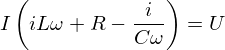

In [3]:
equation = Eq((R+I*omega*L+1/(I*omega*C))*II, U)
equation

Для последовательного контура

$Q=\frac{\rho}{R}=\frac{1}{R}\sqrt\frac{L}{C}=\frac{\omega_0 L}{R}=\frac{1}{\omega_0 C R}$

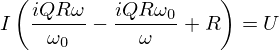

In [4]:
substitute = solve(Eq(Q,omega0*L/R), L, dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(Q,1/(omega0*C*R)), C, dict=1)[0]
equation = equation.subs(substitute)
equation

Введём параметр $X$ таким образом:

$$L\frac{I^2}{2} = \frac{X^2}{2} \Rightarrow I=\frac{X}{\sqrt{L}}$$

In [5]:
substitute = {II: X/(sqrt(L))}
equation = expand(equation.subs(substitute))
equation

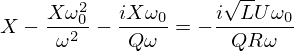

In [6]:
substitute = -sqrt(L)/R/Q*I*(omega0/omega)
equation = expand(Eq(equation.lhs*substitute, equation.rhs*substitute))
equation

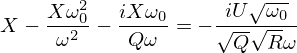

In [7]:
substitute = solve(Eq(Q,omega0*L/R), L, dict=1)[0]
equation = equation.subs(substitute)
equation

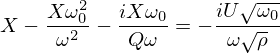

In [8]:
substitute = solve(Eq(Q,ro/R), R, dict=1)[0]
equation1 = equation.subs(substitute)
equation1

Данное уравнение соответствует уравнению (1.7)

# Параллельная схема

![](current_parallel.png)

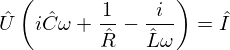

In [9]:
equation = Eq((1/hR+1/(I*omega*hL)+I*omega*hC)*hU, hI)
equation

Для параллельного контура

$Q=\frac{R}{\rho}=R\sqrt\frac{C}{L}=\frac{R}{\omega_0 L}=\omega_0 C R$

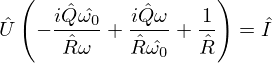

In [10]:
substitute = solve(Eq(hQ,hR/(homega0*hL)), hL, dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(hQ,homega0*hC*hR), hC, dict=1)[0]
equation = equation.subs(substitute)
equation

Введём параметр $\hat X$ таким образом:

$$\hat L\frac{\hat I^2}{2} = \frac{\hat X^2}{2} \Rightarrow \hat I=\frac{\hat X}{\sqrt{\hat L}}$$

$$\hat U=I_\hat L R_\hat L=\frac{\hat X}{\sqrt{\hat L}} \omega \hat L=\hat X\omega \sqrt{\hat L}$$

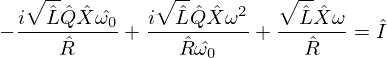

In [11]:
substitute = {hU: hX*omega*sqrt(hL)}
equation = expand(equation.subs(substitute))
equation

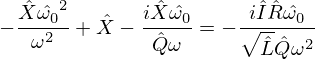

In [12]:
substitute = -hR*I*homega0/(hQ*omega**2*sqrt(hL))
equation = expand(Eq(equation.lhs*substitute, equation.rhs*substitute))
equation

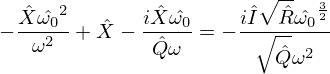

In [13]:
substitute = solve(Eq(hQ,hR/(homega0*hL)), hL, dict=1)[0]
equation = equation.subs(substitute)
equation

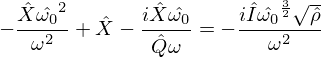

In [14]:
substitute = solve(Eq(hQ,hR/hro), hR, dict=1)[0]
equation2 = equation.subs(substitute)
equation2

Данное уравнение соответствует уравнению (1.6)

# Синтез

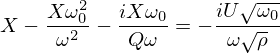

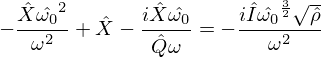

In [15]:
display(equation1)
display(equation2)

Т.к. схема описывает одну и ту-же ячейку, электродинамические и энергитические параметры схем должны быть одинаковы:

$$\hat{Q}=Q$$
$$\hat{\omega_0}=\omega_0$$
$$\hat{X}=X$$

Левые части уравнений равны, следовательно, равны и правые.

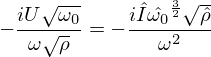

In [16]:
equation = Eq(equation1.rhs, equation2.rhs)
equation

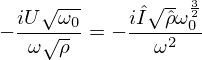

In [17]:
substitute = {homega0: omega0}
equation = equation.subs(substitute)
equation

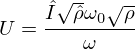

In [18]:
substitute = solve(equation, U)[0]
equation3 = Eq(U, substitute)
equation3

Данное уравнение соответствует уравнению (1.8)

# Выражение через мощность

На стр. 23 было введено выражение:

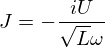

In [19]:
equation = Eq(J, U/(I*omega*sqrt(L)))
equation

Используем найденную выше зависимость:

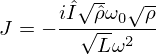

In [20]:
substitute = solve(equation3, U, dict=1)[0]
equation = equation.subs(substitute)
equation

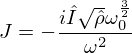

In [21]:
substitute = solve(Eq(ro,omega0*L), ro, dict=1)[0]
equation = equation.subs(substitute)
equation

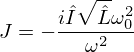

In [22]:
substitute = solve(Eq(hro,omega0*hL), hro, dict=1)[0]
equation = equation.subs(substitute)
equation

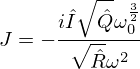

In [23]:
substitute = solve(Eq(hQ,omega0*hL*hR), hL, dict=1)[0]
equation = equation.subs(substitute)
equation

Данное уравнение соответствует уравнению (1.9)